In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#PCA
from sklearn.decomposition import PCA

import math
from math import ceil

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

sns.set()

In [2]:
%store -r df
%store -r df_scaled

#### PCA

In [3]:
df_pca = df_scaled.loc[:, ~df_scaled.columns.str.startswith('HR')].set_index(df_scaled.index)

In [4]:
pca = PCA()
pca_feat = pca.fit_transform(df_pca)

In [5]:
# Get PCA output as table

# Get the eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get the cumulative explained variance ratio 
# Hint: use np.cumsum()
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Combine into a dataframe
pca_results = pd.DataFrame(
    {
        "Eigenvalue": explained_variance,
        "Difference": np.insert(np.diff(explained_variance), 0, 0),
        "Proportion": explained_variance_ratio,
        "Cumulative": cumulative_explained_variance_ratio
    },
        index=range(1, pca.n_components_ + 1)
)

pca_results

,Eigenvalue,Difference,Proportion,Cumulative
1,1.281693e+01,0.000000e+00,2.726920e-01,0.272692
2,3.486598e+00,-9.330329e+00,7.418062e-02,0.346873
3,2.927257e+00,-5.593417e-01,6.228010e-02,0.409153
4,2.521777e+00,-4.054800e-01,5.365314e-02,0.462806
5,1.683189e+00,-8.385881e-01,3.581140e-02,0.498617
6,1.505176e+00,-1.780127e-01,3.202402e-02,0.530641
7,1.161867e+00,-3.433090e-01,2.471980e-02,0.555361
8,1.067863e+00,-9.400406e-02,2.271978e-02,0.578081
9,1.021815e+00,-4.604778e-02,2.174007e-02,0.599821
10,1.005034e+00,-1.678096e-02,2.138304e-02,0.621204


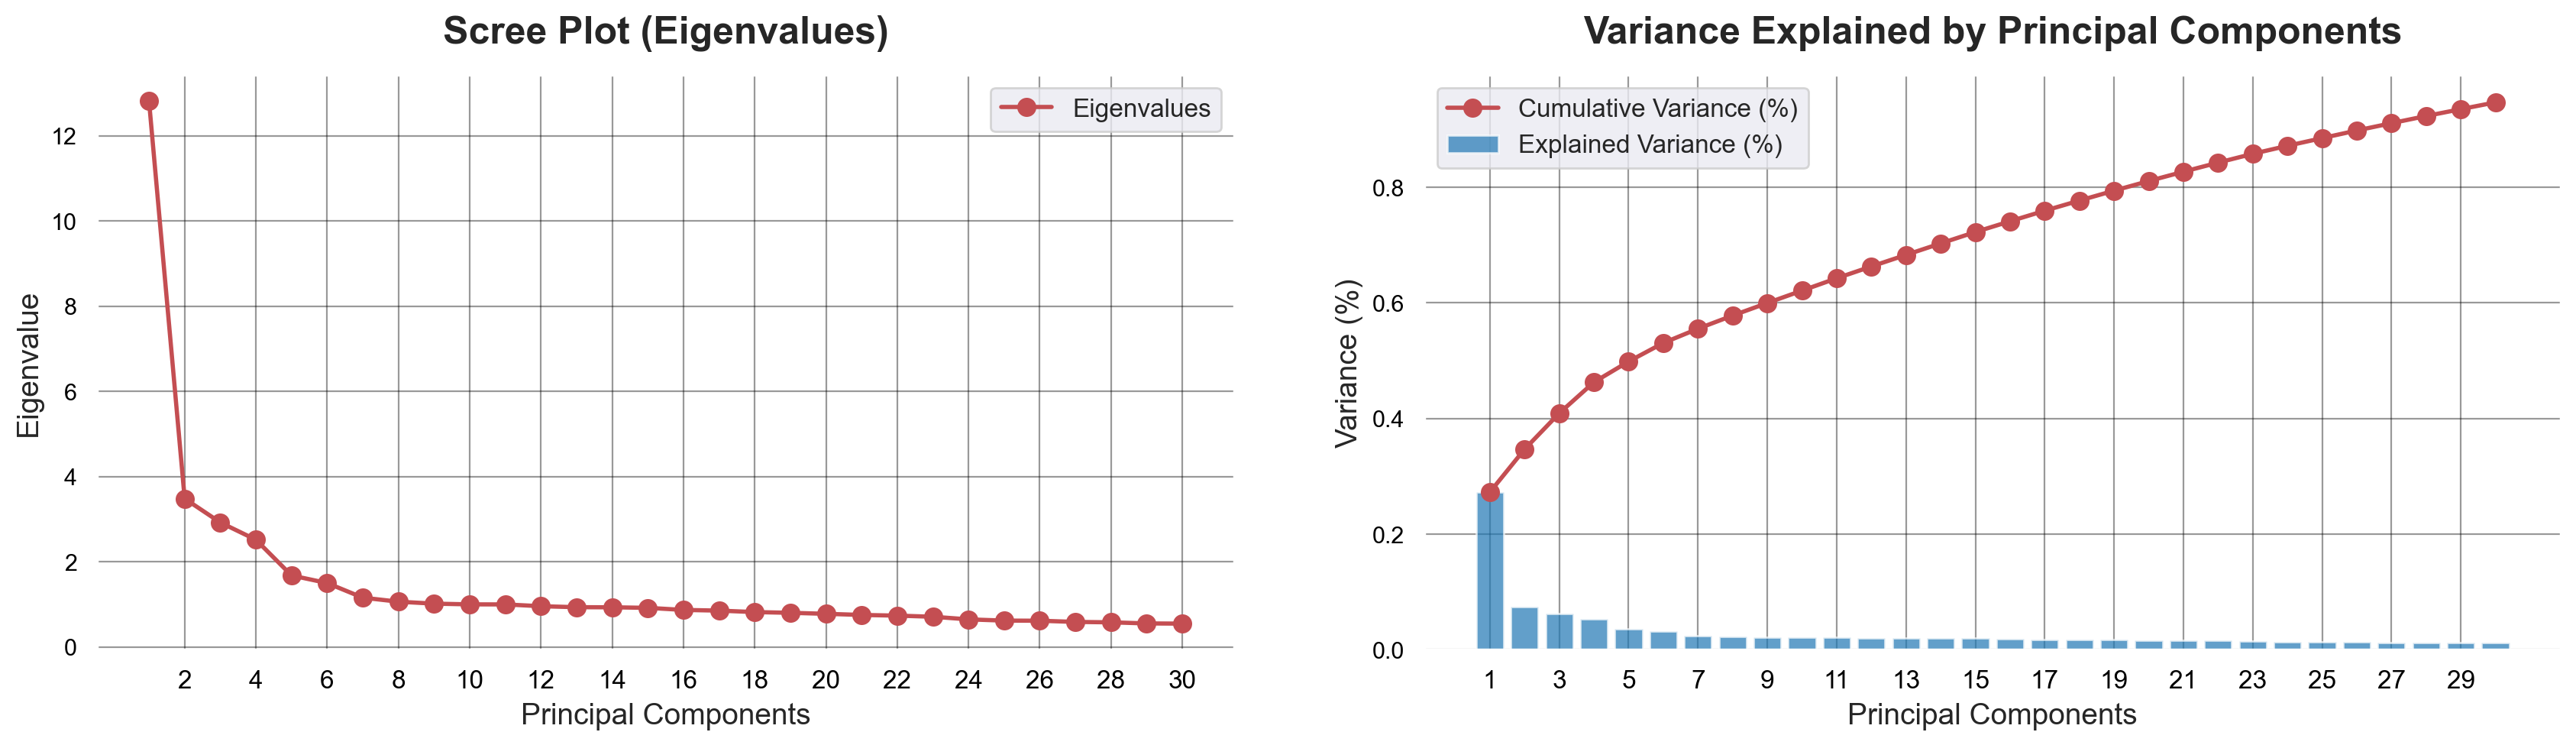

In [11]:
n_pcas = 30

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), facecolor='white')

# Plot 1: Scree Plot (Eigenvalues)
ax1.plot(range(1, n_pcas + 1), explained_variance[:n_pcas], 'ro-', linewidth=2, markersize=8, label='Eigenvalues')
ax1.set_title("Scree Plot (Eigenvalues)", fontsize=18, pad=15, fontweight='bold')
ax1.set_xlabel("Principal Components", fontsize=14)
ax1.set_ylabel("Eigenvalue", fontsize=14)
ax1.set_xticks(range(2, n_pcas + 1, 2))
ax1.set_xticklabels(range(2, n_pcas + 1, 2), fontsize=12)
ax1.set_facecolor('white')
ax1.grid(True, color='black', linestyle='-', linewidth=0.8, alpha=0.4)  # Lighter grid lines
ax1.tick_params(axis='both', which='both', colors='black', width=1)  # Black ticks with better visibility
ax1.legend(fontsize=12, loc='upper right')

# Plot 2: Explained Variance as a Bar Chart (up to 30 PCs)
ax2.bar(range(1, n_pcas + 1), explained_variance_ratio[:n_pcas], 
        color='#1f77b4', alpha=0.7, label='Explained Variance (%)', width=0.8)  # Customize bar color
ax2.plot(range(1, n_pcas + 1), cumulative_explained_variance_ratio[:n_pcas], 
         'ro-', linewidth=2, markersize=8, label='Cumulative Variance (%)')

# Customize the plot
ax2.set_title("Variance Explained by Principal Components", fontsize=18, pad=15, fontweight='bold')
ax2.set_xlabel("Principal Components", fontsize=14)
ax2.set_ylabel("Variance (%)", fontsize=14)
ax2.set_xticks(range(1, n_pcas + 1, 2))  # Show every 2nd PC for clarity
ax2.set_xticklabels(range(1, n_pcas + 1, 2), fontsize=12)
ax2.set_facecolor('white')
ax2.grid(True, color='black', linestyle='-', linewidth=0.8, alpha=0.4)  # Lighter grid lines
ax2.tick_params(axis='both', which='both', colors='black', width=1)  # Black ticks with better visibility

# Add legend
ax2.legend(fontsize=12, loc='upper left')

# Adjust layout to ensure everything fits and has proper padding
plt.tight_layout(pad=4.0)

# Show plot
plt.show()


- 6.1.1. Cumulative percentage of total variance
      - keep 80% of total variance
- 6.1.2. Kaiser's rule
      - keep PC var >=1
- 6.1.3. Scree plot
      - elbow method

In [12]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=18)
pca_feat = pca.fit_transform(df_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# remember index=df_pca.index
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  
pca_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-2.594068,2.282679,2.440812,-3.068784,1.580866,0.851073,-0.391588,-1.454497,2.692393,-0.615311,-0.447831,0.097026,-1.358569,1.045823,0.774447,-0.412204,0.353114,-0.399403
1,-2.736205,1.154972,2.313311,-2.876583,-0.741751,-1.153771,-0.285214,-0.419782,-0.018283,-1.055758,-0.876645,-0.475204,-0.186778,-0.416117,-0.358593,-0.329274,0.582596,0.768038
2,-2.798801,0.580947,2.483667,-2.674678,-0.290031,-1.748302,-1.021140,0.454399,-0.430865,1.103985,0.986372,0.500034,0.281630,-0.200044,-0.142252,-0.092491,0.793993,0.186783
3,-2.401800,1.153421,1.491642,-3.186504,0.538881,-0.050768,-0.157015,-0.945905,1.366848,-0.164148,0.421301,0.381050,-0.800512,0.646072,0.661410,-0.025702,0.198153,0.263437
4,-2.082261,3.134077,0.276340,-3.684287,1.338058,0.717119,0.064312,-0.242274,0.324507,-0.697895,-0.311666,-1.115880,-0.198245,-0.262704,-0.413365,-0.308296,0.521387,-0.204276


In [13]:
df_pca_final = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk
0,-1.341243,-0.397846,-0.096068,-0.457364,-1.178611,-2.739513,-0.418757,-0.422531,-0.271153,-0.124681,...,-0.752515,1.560776,-0.202885,0.567463,-0.313525,-0.349278,-0.513786,-0.569735,0.287031,-0.311383
1,-1.482486,-0.397846,-0.527237,-0.205976,-1.178611,-2.739513,0.681969,-0.151322,-0.271153,-0.124681,...,-0.752515,1.560776,-0.411245,0.518306,-0.313525,-0.349278,0.443229,-0.569735,-0.570309,-0.311383
2,1.483625,-0.758634,-0.527237,-0.205976,-1.178611,-2.739513,0.371155,-0.422531,-0.271153,-0.124681,...,-0.752515,1.560776,-0.626932,0.467420,-0.313525,-0.349278,0.443229,-0.569735,-0.570309,-0.311383
3,-0.070052,-0.397846,-0.383514,-0.457364,-1.178611,-2.696012,-0.418757,0.158935,-0.271153,-0.124681,...,-0.751312,0.756481,-0.145138,-0.018868,-0.313525,-0.349278,-0.035278,-0.023741,-0.570309,-0.311383
4,-1.058756,-0.397846,-0.096068,-0.708752,-1.178611,-2.696012,0.832224,1.312106,-0.271153,-0.124681,...,-0.751312,0.756481,0.369407,0.102525,-0.313525,-0.349278,0.443229,-0.569735,-0.570309,-0.311383


In [14]:
correlation_matrix = df_pca_final[pca_feat_names + df_pca.columns.tolist()].corr()
loadings = correlation_matrix.loc[pca_feat_names, df_pca.columns]
loadings

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk
PC0,0.007392,0.870783,0.964208,0.835871,-0.412577,0.482421,0.363131,0.332610,0.228755,0.275898,...,0.407000,-0.378445,0.802393,0.204399,0.227058,0.267665,0.653542,0.664108,0.651470,0.378081
PC1,0.004738,-0.021362,0.130708,-0.092922,0.334668,-0.139494,0.094956,0.441448,0.170064,0.068840,...,0.086482,0.612984,0.448676,0.627053,0.271755,0.306186,0.123784,-0.064578,-0.202130,-0.117339
PC2,-0.007899,0.013053,0.128451,0.264290,0.160868,-0.338052,-0.090318,-0.451286,-0.148163,0.133982,...,-0.074910,0.623132,-0.226038,0.357360,-0.381837,-0.402745,0.056859,0.220909,0.368757,0.208077
PC3,0.025344,-0.071842,-0.091330,-0.059472,0.627429,0.744664,-0.030849,-0.116572,-0.090529,-0.005248,...,0.729118,0.058856,-0.131013,0.546562,-0.094691,-0.093548,-0.048523,-0.013780,0.014337,-0.034753
PC4,0.017012,-0.217172,0.019293,-0.195305,-0.073708,0.019774,0.126827,-0.143641,-0.338478,0.166579,...,-0.039647,-0.119577,0.146720,-0.083723,-0.342687,-0.348331,-0.062824,0.092984,0.242686,-0.212986
PC5,-0.008120,0.107857,0.052689,0.058488,0.032688,0.098022,-0.234054,-0.104173,0.043727,-0.315930,...,0.012904,-0.084713,-0.046165,-0.064733,-0.105848,-0.234653,-0.235084,0.031274,0.051922,0.335194
PC6,-0.027388,0.095499,-0.030193,0.082454,0.045851,0.042065,-0.279862,-0.181128,0.075671,0.397464,...,-0.032781,-0.069944,-0.035241,-0.084551,-0.332104,0.012339,0.287594,-0.012734,-0.081926,-0.298525
PC7,0.035531,-0.160249,0.049604,-0.023626,0.069401,0.025837,-0.136979,0.061424,-0.007542,0.054452,...,-0.037695,-0.039722,0.034922,-0.049017,0.052318,-0.003546,0.130553,-0.100435,-0.054524,-0.011114
PC8,-0.245642,-0.049979,-0.007790,-0.001521,-0.029110,-0.008693,-0.195192,0.042392,0.048264,-0.202556,...,0.013333,-0.006234,-0.018806,0.000662,0.118322,-0.070552,-0.025628,-0.046260,-0.011159,0.148319
PC9,0.513477,-0.101325,0.003492,0.066242,-0.006918,0.001037,-0.097540,-0.157025,0.503756,-0.001519,...,0.003582,-0.005597,-0.058484,-0.015358,-0.154593,0.045110,0.085711,0.128987,-0.053211,-0.066807


In [15]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: #ffbdbd'
    elif val > 0.45:
        color = 'background-color: #b3ffcc'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings.style.applymap(_color_red_or_green)

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk
PC0,0.007392,0.870783,0.964208,0.835871,-0.412577,0.482421,0.363131,0.332610,0.228755,0.275898,0.253880,0.300010,0.135799,0.188716,0.223600,0.251979,0.284346,0.230052,0.436472,0.159175,0.243874,0.669408,0.676692,0.682224,0.685179,0.667517,0.603966,0.624995,0.970311,0.802393,-0.116063,0.067404,-0.378445,-0.482421,0.717755,0.770204,0.491993,0.407000,-0.378445,0.802393,0.204399,0.227058,0.267665,0.653542,0.664108,0.651470,0.378081
PC1,0.004738,-0.021362,0.130708,-0.092922,0.334668,-0.139494,0.094956,0.441448,0.170064,0.068840,-0.146555,0.055297,0.186247,0.062524,-0.026230,-0.065105,0.138636,-0.047205,-0.032854,0.414374,-0.049792,0.033448,0.038605,0.024235,0.023713,0.006977,-0.018994,-0.020413,0.017378,0.448676,0.712914,0.527580,0.612984,0.139494,-0.385562,-0.193276,-0.181784,0.086482,0.612984,0.448676,0.627053,0.271755,0.306186,0.123784,-0.064578,-0.202130,-0.117339
PC2,-0.007899,0.013053,0.128451,0.264290,0.160868,-0.338052,-0.090318,-0.451286,-0.148163,0.133982,0.218589,0.141951,-0.186434,-0.022257,0.147037,0.116561,-0.059909,0.181979,0.284837,-0.346292,0.161611,0.106608,0.117198,0.114871,0.116101,0.124606,0.111665,0.113966,0.169701,-0.226038,-0.273024,-0.159717,0.623132,0.338052,-0.396959,0.025313,-0.030502,-0.074910,0.623132,-0.226038,0.357360,-0.381837,-0.402745,0.056859,0.220909,0.368757,0.208077
PC3,0.025344,-0.071842,-0.091330,-0.059472,0.627429,0.744664,-0.030849,-0.116572,-0.090529,-0.005248,-0.010553,-0.061645,-0.058283,-0.000908,0.022083,0.056207,-0.024914,-0.057748,0.006516,-0.111749,0.016914,-0.079237,-0.062078,-0.038212,-0.003219,0.035934,-0.067533,-0.068490,-0.059325,-0.131013,-0.104313,-0.121790,0.058856,-0.744664,0.062898,-0.038857,0.026242,0.729118,0.058856,-0.131013,0.546562,-0.094691,-0.093548,-0.048523,-0.013780,0.014337,-0.034753
PC4,0.017012,-0.217172,0.019293,-0.195305,-0.073708,0.019774,0.126827,-0.143641,-0.338478,0.166579,-0.149170,-0.102853,-0.203651,-0.018536,0.240673,0.506857,0.100627,-0.126757,0.210295,0.137306,0.214178,-0.115763,-0.097825,-0.045701,-0.044490,0.034814,-0.001630,0.029219,-0.048107,0.146720,0.359939,0.416629,-0.119577,-0.019774,0.076367,-0.159785,0.292452,-0.039647,-0.119577,0.146720,-0.083723,-0.342687,-0.348331,-0.062824,0.092984,0.242686,-0.212986
PC5,-0.008120,0.107857,0.052689,0.058488,0.032688,0.098022,-0.234054,-0.104173,0.043727,-0.315930,0.297408,0.353756,-0.009740,-0.247201,0.027069,-0.221094,-0.109780,0.456323,0.006934,0.220335,0.009986,-0.057938,-0.070490,-0.076916,-0.085072,-0.072294,0.020810,0.052079,-0.058877,-0.046165,0.278911,0.500115,-0.084713,-0.098022,0.049527,0.173529,-0.227769,0.012904,-0.084713,-0.046165,-0.064733,-0.105848,-0.234653,-0.235084,0.031274,0.051922,0.335194
PC6,-0.027388,0.095499,-0.030193,0.082454,0.045851,0.042065,-0.279862,-0.181128,0.075671,0.397464,0.002845,-0.112914,0.047972,0.303674,-0.112937,-0.355610,0.228162,-0.007474,0.262234,0.070176,0.109507,0.018791,0.024707,0.015965,-0.006886,-0.045845,-0.073400,-0.105480,-0.038821,-0.035241,0.090109,0.125404,-0.069944,-0.042065,-0.005051,0.190875,-0.296913,-0.032781,-0.069944,-0.035241,-0.084551,-0.332104,0.012339,0.287594,-0.012734,-0.081926,-0.298525
PC7,0.035531,-0.160249,0.049604,-0.023626,0.069401,0.025837,-0.136979,0.061424,-0.007542,0.054452,-0.284843,0.490294,-0.301524,0.288536,-0.308767,0.053937,0.054009,0.444020,-0.011615,-0.147053,-0.013897,0.082273,0.079629,0.042499,0.020128,-0.032729,-0.117951,-0.065059,-0.001032,0.034922,-0.030096,0.000064,-0.0397